In [3]:
import pandas as pd 
import seaborn as sns
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
mpg.describe()
#정보 확인 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [20]:
mpg.info()
#기술통계 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [28]:
mpg_notnull = mpg.dropna(axis=0,subset=["horsepower"]).copy()

In [30]:
mpg_notnull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [31]:
mpg_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [32]:
X = mpg[['cylinders', 'displacement','horsepower','weight','acceleration']]
y = mpg['mpg'].to_numpy()

In [33]:
from sklearn.model_selection import train_test_split

# train_input, test_input, train_target, test_target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape

((318, 5), (80, 5))

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [35]:
#모델훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Mean Squared Error: 11.42848101265823


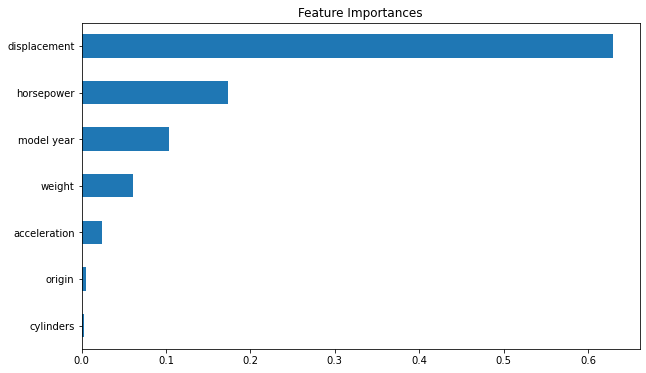

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# 결측치 처리 (NaN 값 처리)
data = data.dropna()

# 무한대 값 처리 (무한대 값을 NaN으로 변환한 후 제거)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

# 너무 큰 값 확인 (optional: 특정 임계값 이상인 값 제거)
# 여기서는 float64가 표현할 수 있는 최대 값을 기준으로 너무 큰 값을 제거합니다.
max_float64 = np.finfo(np.float64).max
data = data[(data.select_dtypes(include=[np.float64]) < max_float64).all(axis=1)]

# 특성과 타겟 변수 분리
X = data.drop(columns=['mpg'])
y = data['mpg']

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정트리 회귀 모델 생성
dt_regressor = DecisionTreeRegressor(random_state=42)

# 모델 훈련
dt_regressor.fit(X_train, y_train)

# 예측
y_pred = dt_regressor.predict(X_test)

# 모델 성능 평가 (MSE: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 특성 중요도 추출
feature_importances = dt_regressor.feature_importances_

# 특성 중요도 시각화
features = X.columns
importances = pd.Series(feature_importances, index=features)

importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


In [10]:
#데이터 전처리 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [11]:
X_train_scaled

array([[ 1.52718818,  1.0901965 ,  1.25238452,  0.55282624, -1.31933367],
       [-0.85051483, -0.92299623, -0.40975295, -0.99966729, -0.41318225],
       [-0.85051483, -0.98134964, -0.94592632, -1.1247723 ,  0.92792185],
       ...,
       [-0.85051483, -0.56315019, -0.22209226, -0.54094894, -0.30444408],
       [-0.85051483, -1.00080078, -1.10677834, -1.09498539,  0.60170734],
       [-0.85051483, -0.92299623, -1.53571704, -1.21413301,  1.94281144]])

In [12]:
X_test_scaled

array([[-0.85051483, -0.98134964, -1.34805636, -1.39881183,  0.63795339],
       [-0.85051483, -0.69930815, -0.65103096, -0.40988656,  1.07290607],
       [ 0.33833667,  0.38995555, -0.08804892, -0.39916327, -0.9568731 ],
       [ 1.52718818,  1.22635446,  1.25238452,  1.15690469, -0.88438099],
       [ 1.52718818,  1.22635446,  1.25238452,  1.51077313, -0.41318225],
       [-0.85051483, -0.92299623, -0.40975295, -1.03541158,  0.31173888],
       [-0.85051483, -0.50479678, -0.30251827, -0.12393226,  0.27549283],
       [ 1.52718818,  2.41287384,  2.994948  ,  2.10412829, -1.68179423],
       [ 1.52718818,  0.66227147,  0.18003777,  1.29988184,  1.2178903 ],
       [ 0.33833667,  0.07873735,         nan, -0.1120175 ,  0.49296917],
       [ 1.52718818,  1.92659541,  2.32473128,  1.04967183, -2.58794565],
       [-0.85051483, -0.98134964, -0.97273499, -1.19626087, -0.23195197],
       [-0.85051483, -0.98134964, -0.89230898, -1.20817563,  1.76158115],
       [ 1.52718818,  1.0901965 ,  1.2

In [15]:
#결정트리 


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').